In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.applications import Xception
from tensorflow.keras import Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow_addons.losses import TripletSemiHardLoss, TripletHardLoss
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mig
import numpy as np
import pathlib
np.random.seed(69)

C:\Users\Daniel Quang\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.3.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


**DEFINING CLASS**

In [2]:
PATH = './PokemonData/'
data_dir = pathlib.Path(PATH)

In [3]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES.shape

(151,)

In [11]:
IDG_train = ImageDataGenerator(rescale = 1./255,
                               validation_split=0.2,
                               horizontal_flip=True,
                               zoom_range=0.1,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range=60,
                               channel_shift_range=69)

IDG_valid = ImageDataGenerator(rescale = 1./255,
                               validation_split=0.2)

train_data = IDG_train.flow_from_directory(PATH,
                                           target_size=(299, 299),
                                           batch_size=152,
                                           classes = list(CLASS_NAMES),
                                           subset='training',
                                           shuffle=True,
                                           seed=69,
                                           class_mode='sparse')

validation_data = IDG_valid.flow_from_directory(PATH,
                                                target_size=(299, 299),
                                                batch_size=152,
                                                classes = list(CLASS_NAMES),
                                                subset='validation',
                                                shuffle=False,
                                                seed=69,
                                                class_mode='sparse')

Found 5542 images belonging to 151 classes.
Found 1311 images belonging to 151 classes.


In [5]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[int(label_batch[n])])
      plt.axis('off')

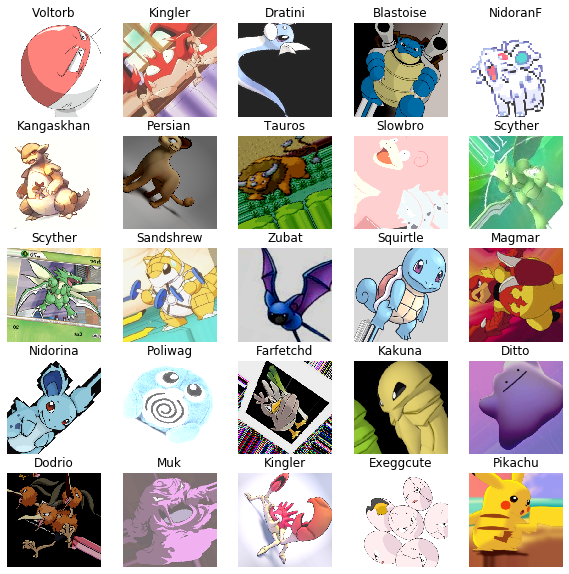

In [6]:
image_batch, label_batch = train_data[0]
show_batch(image_batch, label_batch)

In [7]:
model = Sequential()
##Convutional Layers
model.add(Conv2D(8, (4, 4),input_shape=(299,299,3)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (4, 4)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (4, 4)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4, 4)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4, 4)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))

##Fully Connected Layers

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(128))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 8)       392       
_________________________________________________________________
activation (Activation)      (None, 296, 296, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 296, 296, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 16)      2064      
_________________________________________________________________
activation_1 (Activation)    (None, 145, 145, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 145, 145, 16)      0

In [9]:
model.compile(optimizer='adam', loss=TripletSemiHardLoss())

hist = model.fit(train_data, epochs=50, steps_per_epoch = len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/50
37/37 [==============================] - 97s 3s/step - loss: 1.2311 - val_loss: 0.9946
Epoch 2/50
37/37 [==============================] - 98s 3s/step - loss: 0.8285 - val_loss: 0.7560
Epoch 3/50
37/37 [==============================] - 98s 3s/step - loss: 0.5812 - val_loss: 0.5476
Epoch 4/50
37/37 [==============================] - 98s 3s/step - loss: 2.3633 - val_loss: 0.9385
Epoch 5/50
37/37 [==============================] - 97s 3s/step - loss: 0.4767 - val_loss: 0.8967
Epoch 6/50
37/37 [==============================] - 96s 3s/step - loss: 1.1531 - val_loss: 0.7087
Epoch 7/50
37/37 [==============================] - 97s 3s/step - loss: 0.6290 - val_loss: 0.7935
Epoch 8/50
37/37 [==============================] - 97s 3s/step - loss: 0.4716 - val_loss: 0.5028
Epoch 9/50
37/37 [==============================] - 98s 3s/step - loss: 0.4655 - val_loss: 0.5117
Epoch 10/50
37/37 [==============================] - 98s 3s/step - loss: 0.8821 - val_loss: 0.3118
Epoch 11/50
37/37 [

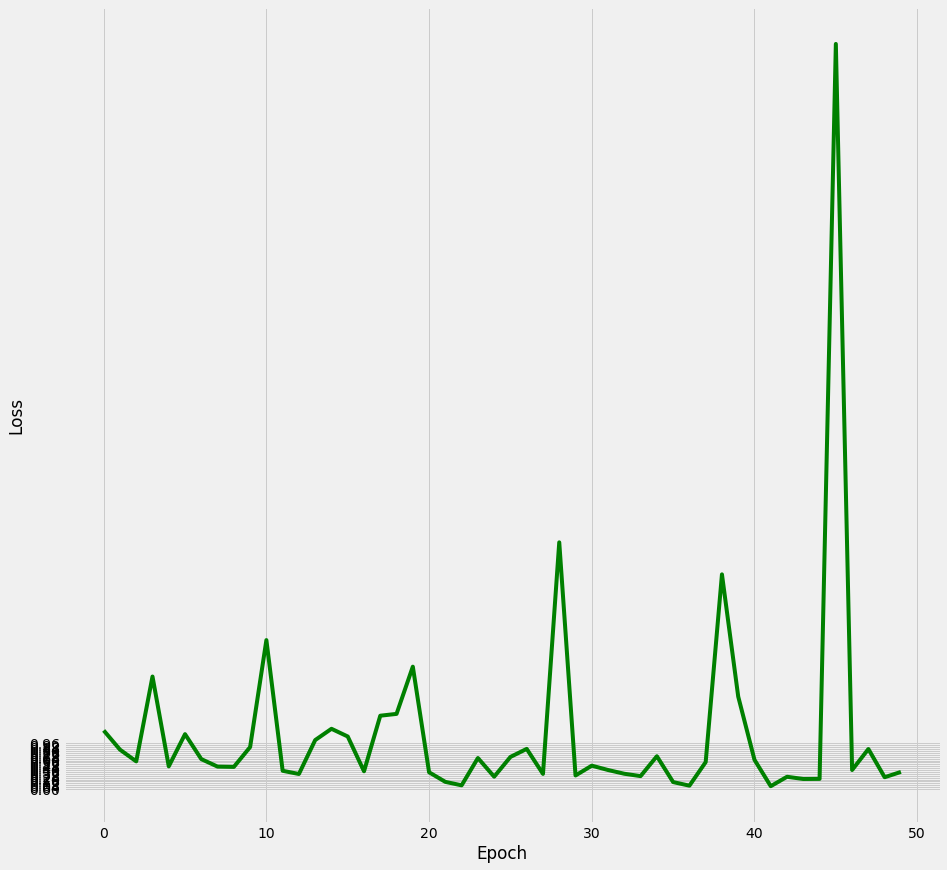

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,14))
plt.plot(hist.history['loss'],label='loss',color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yticks(np.arange(0, 1, step=0.04))
plt.show()

In [12]:
y_true = validation_data.labels
y_pred = model.predict(validation_data)

In [23]:
import umap
coords = umap.UMAP().fit_transform(y_pred)

In [33]:
import pandas as pd
labels = [CLASS_NAMES[i] for i in y_true]
df = pd.DataFrame()
df['coord1'] = coords[:, 0]
df['coord2'] = coords[:, 1]
df['Label'] = labels
df['IsPikachu'] = df['Label'] == 'Pikachu'

In [27]:
import seaborn as sns

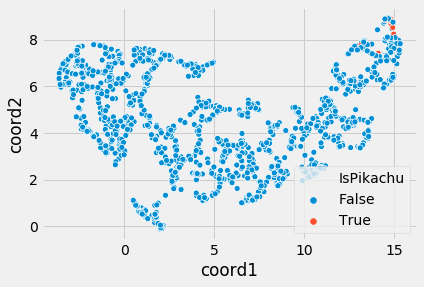

In [36]:
sns.scatterplot(data=df, x='coord1', y='coord2', hue='IsPikachu')